# images

using https://platform.openai.com/docs/guides/images/usage?context=python

In [1]:
import os
os.environ["abcli_path_bash"] = "{}/git/awesome-bash-cli/bash".format(os.getenv("HOME"))

In [2]:
import json
from abcli import fullname, string
from abcli.modules import objects
from openai_cli.images.api import OpenAIImageGenerator
from abcli import file
import abcli.logging
import logging

logger = logging.getLogger()

logger.info(f"{fullname()}, built on {string.pretty_date()}")

Found credentials in shared credentials file: ~/.aws/credentials
abcli-7.2638.1-unknown, built on 20 January 2024, 19:14:59


In [3]:
object_name = f"openai-images-{string.timestamp()}"
object_path = objects.object_path(object_name, create=True)

In [4]:
prompt = "a person flying through the streets of Vancouver."
filename = objects.path_of(f"{string.timestamp()}.png",object_name)

In [5]:
generator = OpenAIImageGenerator(verbose=True)

OpenAIImageGenerator


OpenAIImageGenerator.generate: a person flying through the streets of Vancouver.
OpenAIImageGenerator.augment_prompt: I NEED to test how the tool works with extremely simple prompts. DO NOT add any detail, just use this prompt AS-IS and do not revise it: a person flying through the streets of Vancouver.
HTTP Request: POST https://api.openai.com/v1/images/generations "HTTP/1.1 200 OK"
{
    "created": 1705806912,
    "data": [
        {
            "b64_json": null,
            "revised_prompt": "A Hispanic woman, with long brown hair tied up in a ponytail, is flying through the bustling streets of Vancouver. She wears casual clothes - a faded jeans and a white t-shirt. The clean and modern buildings rise tall and the streets full of people engaged in their daily activities, make for a surreal backdrop. The sun is just setting, casting a warm ethereal glow over the city, while the woman flying adds a touch of magic and bewilderment. After all, who flies over a city in their regular clot

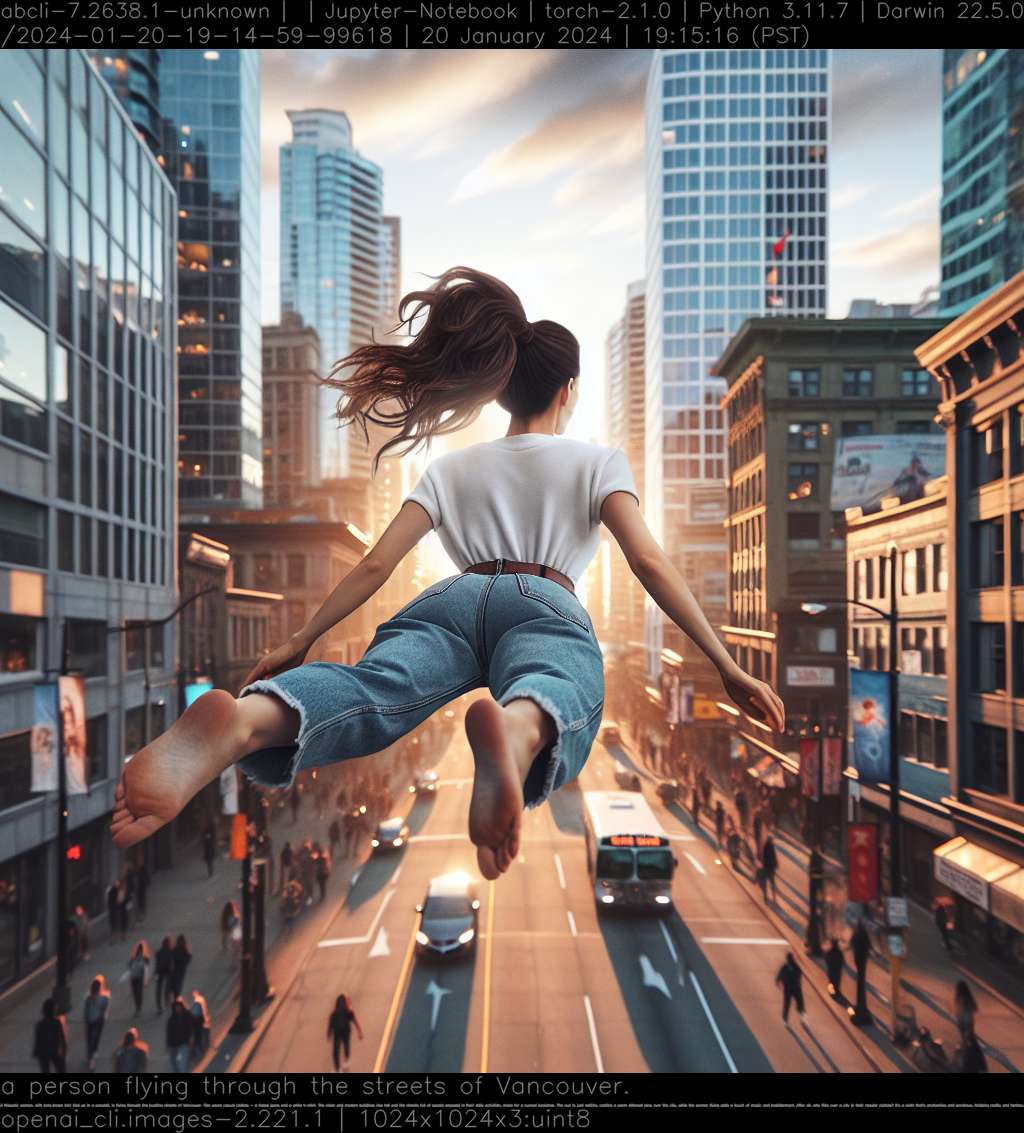

In [6]:
success, response = generator.generate(
    prompt=prompt,
    filename=filename)

assert success

---

In [7]:
%%bash -s $object_name
source ~/git/awesome-bash-cli/bash/abcli.sh in_notebook

object_name=$1

abcli_upload - $object_name

🔋 gpu: not found.
🚀 abcli-7.2638.1.2023-06-aws-batch-a
confirmed: openai-images-2024-01-20-19-14-59-42940 does not exist.
openai-images-2024-01-20-19-14-59-42940 open upload started.
upload: ../../../storage/abcli/openai-images-2024-01-20-19-14-59-42940/2024-01-20-19-14-59-99618.png to s3://kamangir/bolt/openai-images-2024-01-20-19-14-59-42940/2024-01-20-19-14-59-99618.png


openai-images-2024-01-20-19-14-59-42940 += #open.


In [8]:
# END